## Create water mask for later training the model
To generate the ground truth images we use the <code>create_gt</code> module. An example of the floodmap image retrieved for the flood in Sardinia, is shown. 

In [33]:
water_mask = create_gt.compute_water(image_name, floodmap)

In [34]:
water_mask.shape,np.unique(water_mask)

((384, 1012), array([-1,  0,  1,  2], dtype=int16))

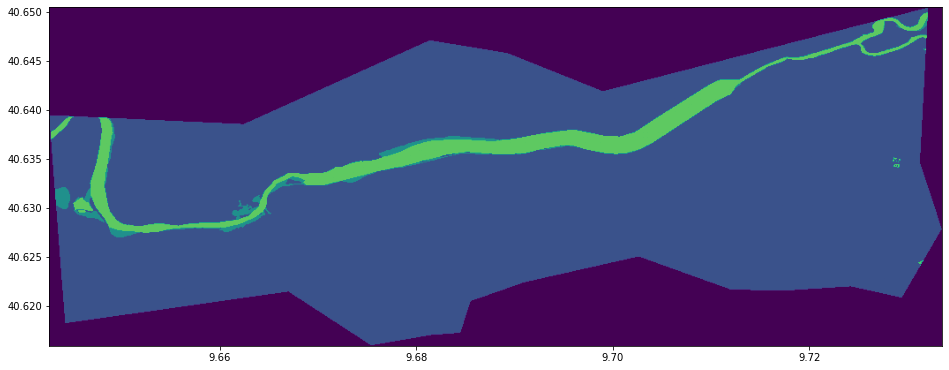

<AxesSubplot:>

In [35]:
rasterioplt.show(water_mask,vmin=-1, vmax=3, transform=transform)